<a href="https://colab.research.google.com/github/Kim-Jeong-Ju/AI_Modeling/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Drive Connection and Packages Importation**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import seaborn as sn

from sklearn import cluster, datasets
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from scipy.cluster.hierarchy import ward, dendrogram

import graphviz
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
%matplotlib inline

Mounted at /content/drive


# **Clustering, 군집화**

### **① K-Means Clustering -- Partitioning Clustering Algorithm**

(59, 4) (59, 1)

Original Input feature : (59, 4)
Standard Scaling Input feature : (59, 4)
MinMax Scaling Input feature : (59, 4)



Text(0.5, 1.0, 'Fruits Dataset by K-Means Clustering with MinMax Scaling')

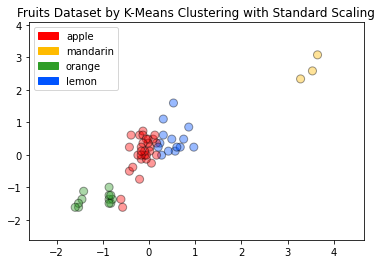

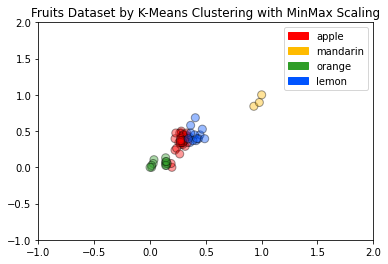

In [ ]:
# Load data set -> Fruits Classification data set
fruits = pd.read_table('/content/drive/MyDrive/Colab Notebooks/data/fruit_data_with_colors.txt')
X_fruits = np.asarray(fruits[['mass', 'width', 'height', 'color_score']])
y_fruits = np.asarray(fruits[['fruit_label']] - 1)
print(X_fruits.shape, y_fruits.shape)
print()


# Input Feature Normalization before applying K-Means
X_standard_norm = StandardScaler().fit(X_fruits).transform(X_fruits)      # Standard Scaling : 표준화, 평균=0 and 분산=1인 분포로 만드는 작업
X_minmax_norm = MinMaxScaler().fit(X_fruits).transform(X_fruits)          # MinMax Scaling : 정규화, 모든 data를 0과 1사이의 값으로 만드는 작업
X_kmeans = KMeans(n_clusters=4, random_state=0).fit(X_fruits)
print(f"Original Input feature : {X_fruits.shape}")
print(f"Standard Scaling Input feature : {X_standard_norm.shape}")
print(f"MinMax Scaling Input feature : {X_minmax_norm.shape}")
print()

# Plot K-Means version of the Fruit Classification data set
def plot_labelled_scatter(X, y, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FF0000', '#FFBB00', '#2F9D27', '#0054FF']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

plot_labelled_scatter(X_standard_norm, X_kmeans.labels_, ['apple','mandarin','orange','lemon'])
plt.title('Fruits Dataset by K-Means Clustering with Standard Scaling')

plot_labelled_scatter(X_minmax_norm, X_kmeans.labels_, ['apple','mandarin','orange','lemon'])
plt.title('Fruits Dataset by K-Means Clustering with MinMax Scaling')

(100, 2) (100,) [0 1 2]


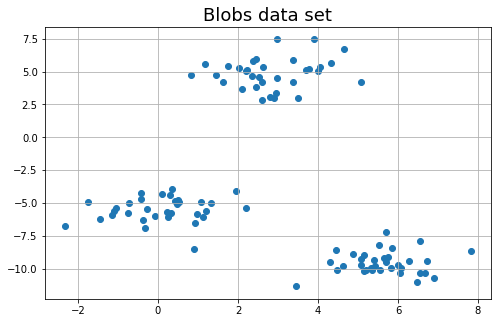

Text(0.5, 1.0, 'Blobs data set clustered by K-Means')

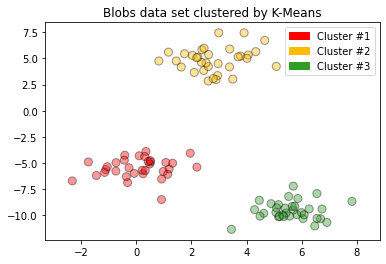

In [ ]:
# Load data set -> Blobs data set
X_blobs, y_blobs = make_blobs(random_state=10)
print(X_blobs.shape, y_blobs.shape, np.unique(y_blobs))

plt.figure(figsize=(8, 5))
plt.title("Blobs data set", fontsize=18)
plt.grid(True)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1])
plt.show()

# Plot K-Means version of the Blobs data set
X_blobs_kmeans = KMeans(n_clusters=3).fit(X_blobs)
plot_labelled_scatter(X_blobs, X_blobs_kmeans.labels_, ['Cluster #1', 'Cluster #2', 'Cluster #3'])
plt.title('Blobs data set clustered by K-Means')

(1500, 2)
(1500, 2)


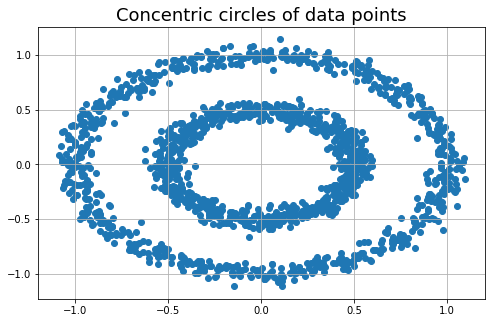

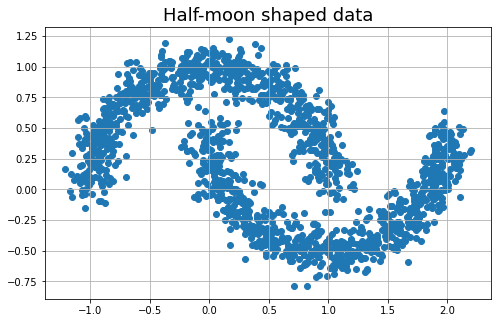

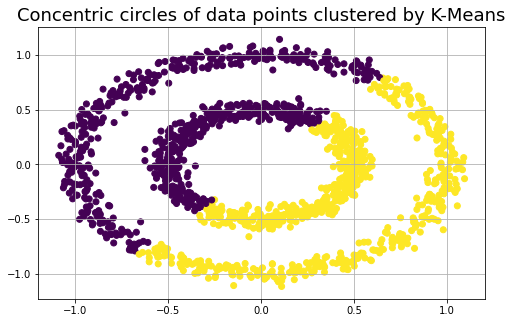

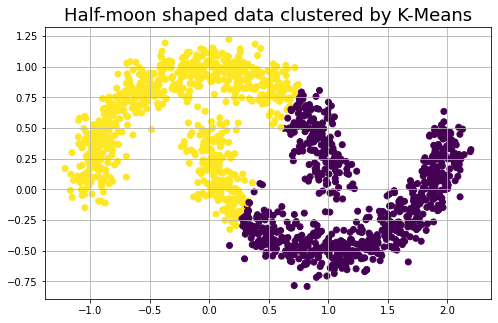

In [ ]:
# Load data set -> Noisy Circles and Noisy Moons data set
n_samples = 1500
noisy_circles, circle_labels = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_circles = np.array(noisy_circles)
print(noisy_circles.shape)

noisy_moons, moon_labels = datasets.make_moons(n_samples=n_samples, noise=0.1)
noisy_moons = np.array(noisy_moons)
print(noisy_moons.shape)

# Plot Original data set
plt.figure(figsize=(8, 5))
plt.title("Concentric circles of data points", fontsize=18)
plt.grid(True)
plt.scatter(noisy_circles[:, 0], noisy_circles[:, 1])
plt.show()

plt.figure(figsize=(8, 5))
plt.title("Half-moon shaped data", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:, 0], noisy_moons[:, 1])
plt.show()

# K-Means Clustering
circle_kmeans = KMeans(n_clusters=2, random_state=0).fit(noisy_circles)
moon_kmeans = KMeans(n_clusters=2, random_state=0).fit(noisy_moons)

# Plot data set clustered by K-Means
plt.figure(figsize=(8, 5))
plt.title("Concentric circles of data points clustered by K-Means", fontsize=18)
plt.grid(True)
plt.scatter(noisy_circles[:, 0], noisy_circles[:, 1], c=circle_kmeans.labels_)
plt.show()

plt.figure(figsize=(8, 5))
plt.title("Half-moon shaped data clustered by K-Means", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:, 0], noisy_moons[:, 1], c=moon_kmeans.labels_)
plt.show()

### **② Agglomerative Clustering with using Dendrogram by Scipy package -- Hierarchical Clustering Algorithm**

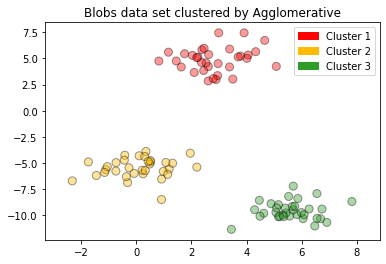

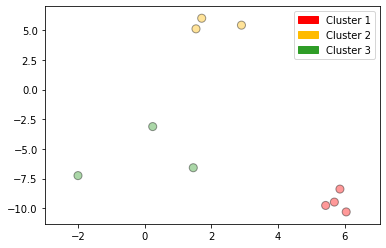

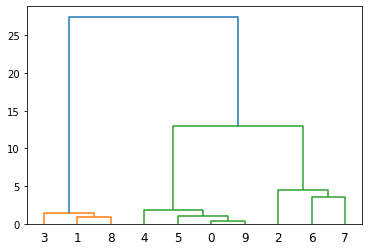

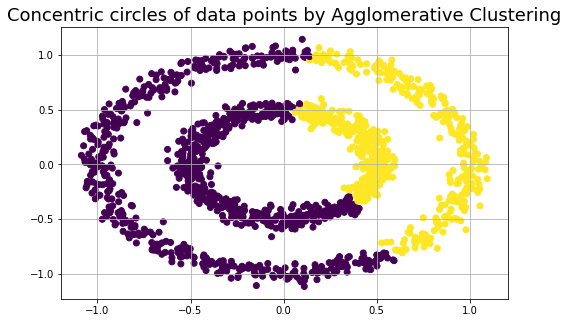

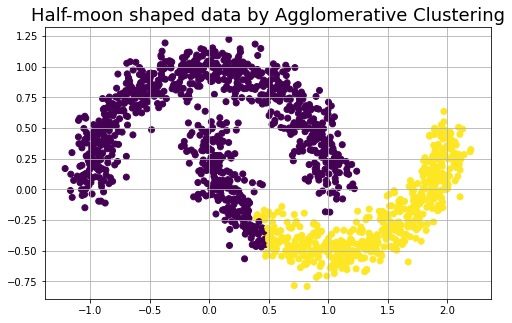

In [ ]:
# Plot Agglomerative version of Blobs data set
X_blobs_agglo = AgglomerativeClustering(n_clusters=3).fit_predict(X_blobs)
plot_labelled_scatter(X_blobs, X_blobs_agglo, ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('Blobs data set clustered by Agglomerative')

# Creating a Dendrogram using scipy
X_small_blobs, y_small_blobs = make_blobs(random_state=10, n_samples=10)
plot_labelled_scatter(X_small_blobs, y_small_blobs, ['Cluster 1', 'Cluster 2', 'Cluster 3'])

plt.figure()
dendrogram(ward(X_small_blobs))
plt.show()


# Plot Agglomerative version of Noisy Circles & Noisy Moons
circle_agglo = AgglomerativeClustering(n_clusters=2).fit(noisy_circles)
plt.figure(figsize=(8, 5))
plt.title("Concentric circles of data points by Agglomerative Clustering", fontsize=18)
plt.grid(True)
plt.scatter(noisy_circles[:, 0], noisy_circles[:, 1], c=circle_agglo.labels_)
plt.show()

moon_agglo = AgglomerativeClustering(n_clusters=2).fit(noisy_moons)
plt.figure(figsize=(8, 5))
plt.title("Half-moon shaped data by Agglomerative Clustering", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:, 0], noisy_moons[:, 1], c=moon_agglo.labels_)
plt.show()

### **③ DBSCAN Clustering -- Density-based Clustering Algorithm**

Cluster Membership Values
[ 0  1  0  2  0  0  0  2  2 -1  1  2  0  0 -1  0  0  1 -1  1  1  2  2  2
  1]


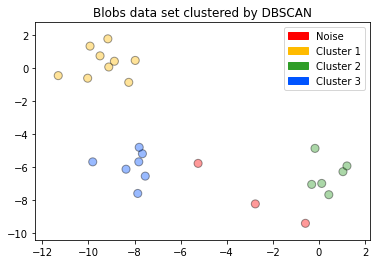

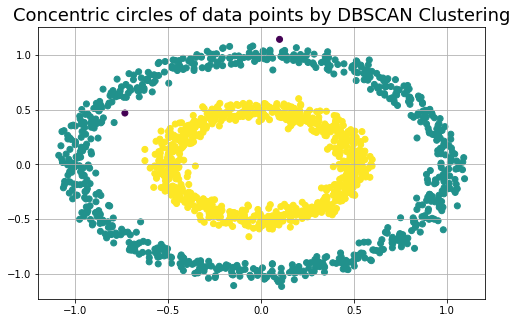

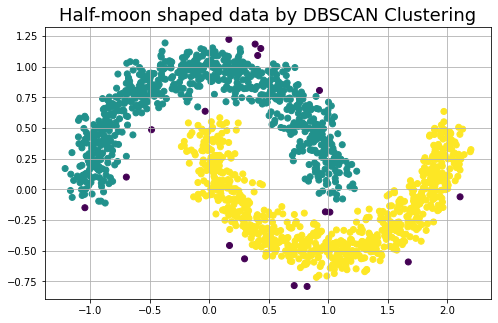

In [ ]:
# Plot DBSCAN version of Blobs data set
X_blobs, y_blobs = make_blobs(random_state=9, n_samples=25)
X_blobs_dbscan = DBSCAN(eps=2, min_samples=2).fit_predict(X_blobs)      # eps = core point를 중심으로 측정되는 유클리디언 거리값(원의 반지름)
print("Cluster Membership Values\n{}".format(X_blobs_dbscan))
plot_labelled_scatter(X_blobs, X_blobs_dbscan + 1, ['Noise', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('Blobs data set clustered by DBSCAN')


# Plot DBSCAN version of Noisy Circles & Noisy Moons
circle_dbscan = DBSCAN(eps=0.1, min_samples=5).fit(noisy_circles)
plt.figure(figsize=(8, 5))
plt.title("Concentric circles of data points by DBSCAN Clustering", fontsize=18)
plt.grid(True)
plt.scatter(noisy_circles[:, 0], noisy_circles[:, 1], c=circle_dbscan.labels_)
plt.show()

moon_dbscan = DBSCAN(eps=0.1, min_samples=5).fit(noisy_moons)
plt.figure(figsize=(8, 5))
plt.title("Half-moon shaped data by DBSCAN Clustering", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:, 0], noisy_moons[:, 1], c=moon_dbscan.labels_)
plt.show()